In [1]:
from Match_recuperation.Data_Parse import *
import pandas as pd
from oppenant_analysis.oppenent_analysis import *
list_match = read_all_csgo_match_of_one_map_json("de_inferno")

In [2]:
fav_bomb_site_analysis("Memetits","de_inferno")

'prob A is :0.39655172413793105, prob B is :0.603448275862069'

In [3]:
num_match = 0
round_t = 0
frame = 7
side = 't'
[list_match[num_match]["gameRounds"][round_t]["frames"][-1]['bomb']['x'],list_match[num_match]["gameRounds"][round_t]["frames"][-1]['bomb']['y']]

[543.96875, 3017.84375]

In [5]:
len(list_match[num_match]["gameRounds"])

26

In [6]:
list_match[num_match]["gameRounds"][25]

{'roundNum': 26,
 'isWarmup': False,
 'startTick': 310904,
 'freezeTimeEndTick': 312428,
 'endTick': 318965,
 'endOfficialTick': 319861,
 'bombPlantTick': None,
 'tScore': 10,
 'ctScore': 15,
 'endTScore': 10,
 'endCTScore': 16,
 'ctTeam': 'team_Brixzitoo',
 'tTeam': 'team_Offusqued',
 'winningSide': 'CT',
 'winningTeam': 'team_Brixzitoo',
 'losingTeam': 'team_Offusqued',
 'roundEndReason': 'CTWin',
 'ctFreezeTimeEndEqVal': 28850,
 'ctRoundStartEqVal': 17200,
 'ctRoundSpendMoney': 12300,
 'ctBuyType': 'Full Buy',
 'tFreezeTimeEndEqVal': 18600,
 'tRoundStartEqVal': 1000,
 'tRoundSpendMoney': 17600,
 'tBuyType': 'Semi Buy',
 'ctSide': {'teamName': 'team_Brixzitoo',
  'players': [{'playerName': 'Furiyox', 'steamID': 76561198056621009},
   {'playerName': 'Brixzitoo', 'steamID': 76561198388709459},
   {'playerName': 'Memetits', 'steamID': 76561198356404031},
   {'playerName': 'GiM6', 'steamID': 76561198160839517},
   {'playerName': 'Rogoj1ne', 'steamID': 76561198883258102}]},
 'tSide': {'te

In [15]:
from Match_recuperation.Data_Parse import *
from Graphic_build.coord_managing import *
from Graphic_build.heatmap import *


map_select = "de_inferno"
dataframe_position_final = pd.DataFrame(columns=['x', 'y'])
num_match = 0
round_t = 0
frame = 7
side = 't'
prob_place = pd.DataFrame()
place = pd.DataFrame(index=['position_match' + str(num_match)])
for player_id in range(len(list_match[num_match]["gameRounds"][round_t]["frames"][frame][side]) - 1):
    x = list_match[num_match]["gameRounds"][round_t]["frames"][frame][side]["players"][player_id]['x']
    y = list_match[num_match]["gameRounds"][round_t]["frames"][frame][side]["players"][player_id]['y']   
    dataframe_position_final = position_coordonate(dataframe_position_final,map_select,x,y)

dataframe_position_final

,x,y
0,609.429118,707.284978
1,409.664363,826.549475
2,595.639321,773.997264
3,367.779168,613.407150
4,583.269182,797.196503


In [29]:
list_match[num_match]["gameRounds"][round_t]["frames"][frame][side]["players"]

def get_coord_dataframe(map_select,dic_list,x,y,side = None):
    dataframe_position_final = pd.DataFrame(columns=['x', 'y'])
    for element in dic_list:
        X = element[x]
        Y = element[y]
        dataframe_position_final = position_coordonate(dataframe_position_final,map_select,X,Y)
    return dataframe_position_final

In [30]:
get_coord_dataframe(map_select,list_match[0]["gameRounds"][0]['grenades'],'grenadeX','grenadeY')

,x,y
0,390.693294,494.282188
1,731.499685,628.607158


In [1]:
l = ['test']
str(l)

"['test']"

In [34]:
def kill_position_before_bomb_planted(list_match,CT,T,time,dataframeCT,dataframeT):
    cpt=-1
    for data in list_match:
        cpt+=1
        print(cpt)
        for r in range(len(data["gameRounds"])):
            timer=50000
            if data["gameRounds"][r]["bombEvents"]!=[]:
                timer=data["gameRounds"][r]["bombEvents"][0]["seconds"]
            if data["gameRounds"][r]["kills"]!=None:
                nb_ct=5
                nb_t=5
                for i in range(len(data["gameRounds"][r]["kills"])):  
                        time.append(data["gameRounds"][r]["kills"][i]["seconds"])
                        if data["gameRounds"][r]["kills"][i]["attackerSide"]=="CT": 
                            new_ct=data["gameRounds"][r]["kills"][i]                          
                            new_ct["CT_position"]=[pointx_to_resolutionx(data["gameRounds"][r]["kills"][i]["AttackerX"],data["MapName"]),pointy_to_resolutiony(data["gameRounds"][r]["kills"][i]["AttackerY"],data["MapName"]),data["gameRounds"][r]["kills"][i]["AttackerZ"]]
                            if data["gameRounds"][r]["kills"][i]["Second"]>=timer:
                                new_ct["BombIsPlanted"]="True"
                            else:
                                new_ct["BombIsPlanted"]="False"
                            new_ct['Clutch']=str(nb_ct)+"V"+str(nb_t)
                            nb_t=nb_t -1
                            dataframeCT = dataframeCT.append(new_ct,ignore_index=True)

                        if data["gameRounds"][r]["kills"][i]["AttackerSide"]=="T":
                            new_t=data["gameRounds"][r]["kills"][iKills
                            new_t["T_position"]=[pointx_to_resolutionx(data["gameRounds"][r]["kills"][i]["AttackerX"],data["MapName"]),pointy_to_resolutiony(data["gameRounds"][r]["kills"][i]["AttackerY"],data["MapName"]),data["gameRounds"][r]["kills"][i]["AttackerZ"]]
                            if data["gameRounds"][r]["kills"][i]["Second"]>=timer:
                                new_t["BombIsPlanted2"]="True"
                            else:
                                new_t["BombIsPlanted2"]="False"
                            new_t['Clutch']=str(nb_ct)+"V"+str(nb_t)
                            nb_ct=nb_ct-1
                            dataframeT = dataframeT.append(new_t,ignore_index=True)                                                     
    return dataframeCT,dataframeT

,SecondMid,Banana,Middle,BackAlley,Apartments,TRamp,prob
0,0.0,2,0.0,1.0,2.0,0.0,0.111111
1,0.0,4,0.0,0.0,0.0,1.0,0.111111
2,1.0,2,0.0,0.0,2.0,0.0,0.111111
3,1.0,2,0.0,1.0,1.0,0.0,0.111111
4,1.0,2,0.0,2.0,0.0,0.0,0.222222
5,1.0,3,1.0,0.0,0.0,0.0,0.111111
6,2.0,2,0.0,1.0,0.0,0.0,0.111111
7,3.0,2,0.0,0.0,0.0,0.0,0.111111


In [19]:
def pointx_to_resolutionx(xinput,map_of_games,resX=1024):
    df_map_adjustement = pd.read_csv ("C:/Users/thibault/cs_go_project/map_adjustement/map_data.csv")
    startX=df_map_adjustement[df_map_adjustement["map"]==map_of_games]["StartX"].values
    endX=df_map_adjustement[df_map_adjustement["map"]==map_of_games]["EndX"].values
    try:
        sizeX=endX-startX
        if startX < 0:
            xinput += startX *(-1.0)
        else:
            xinput += startX
        xoutput = float((xinput / abs(sizeX)) * resX)
        return xoutput
    except:
        print(xinput)

def pointy_to_resolutiony(yinput,map_of_games,resY=1024):
    df_map_adjustement = pd.read_csv ("C:/Users/thibault/cs_go_project/map_adjustement/map_data.csv")
    startY=df_map_adjustement[df_map_adjustement["map"]==map_of_games]["StartY"].values
    endY=df_map_adjustement[df_map_adjustement["map"]==map_of_games]["EndY"].values
    try:
        sizeY=endY-startY
        if startY < 0:
            yinput += startY *(-1.0)
        else:
            yinput += startY
        youtput = float((yinput / abs(sizeY)) * resY)

        return resY-youtput
    except:
        print(yinput)

In [41]:
ct_x = pointx_to_resolutionx(list_match[0]["gameRounds"][3]["bombEvents"][0]['playerX'],"de_mirage")

In [42]:
ct_y = pointy_to_resolutiony(list_match[0]["gameRounds"][3]["bombEvents"][0]['playerY'],"de_mirage")

In [22]:
def heatmap(list_of_dataframeCT,list_of_dataframeT,map_bg):
    plt.figure()
    cpt2 = len(list_of_dataframeCT) + len(list_of_dataframeT) + 1
    cpt=0   
    fig, ax = plt.subplots(ncols=cpt2, nrows=1, figsize=(20, 20))
    ax[0].set_title('Plot T and CT')
    ax[1].set_title('Hexbin map of CT')
    ax[2].set_title('Hexbin map of T')
    for df in list_of_dataframeCT: 
        
        ax[0].scatter(
                [dataframeCTX[0] for dataframeCTX in df["CT_position"] ],
                [dataframeCTY[1] for dataframeCTY in df["CT_position"] ],
                color="blue",
                    alpha=0.5,
                    zorder=1,
                    cmap='hot'
                )
        hb=ax[cpt+1].hexbin([dataframeCTX[0] for dataframeCTX in df["CT_position"] ], [dataframeCTY[1] for dataframeCTY in df["CT_position"] ], gridsize=50,mincnt=0.01,alpha=0.5) 
        ax[cpt+1].imshow(map_bg,
                zorder=0)
        divider = make_axes_locatable(ax[cpt+1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cb=fig.colorbar(hb,ax=ax[cpt+1],cax=cax)      
        ax[cpt+2].imshow(map_bg,   
                zorder=0)  
        cpt+=2
    ax[0].imshow(map_bg, 
            zorder=0)        
    cpt=0    
    for df in list_of_dataframeT:            
        ax[0].scatter(
            [dataframeTX[0] for dataframeTX in df["T_position"] ],
                [dataframeTY[1] for dataframeTY in df["T_position"] ],
                color="red",
                alpha=0.5,
                   zorder=1,        
                )
        ax[cpt+2].hexbin([dataframeTX[0] for dataframeTX in df["T_position"] ], [dataframeTY[1] for dataframeTY in df["T_position"] ], gridsize=50,mincnt=0.01,alpha=0.5)
        divider = make_axes_locatable(ax[cpt+2])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cb=fig.colorbar(hb,ax=ax[cpt+2],cax=cax)
        cpt+=2   
    plt.show() 

In [139]:
def gunround_T_analysis(player_name,map_select):
    dataframe_position_final = pd.DataFrame(columns=['x','y'])
    list_match = read_all_csgo_match_of_one_map_json(map_select)
    prob_place = pd.DataFrame()
    for num_match in range(len(list_match)):

        round_t = 0
        for i in range(len(list_match[num_match]["gameRounds"][round_t]["frames"][7]['t']['players'])):
            if list_match[num_match]["gameRounds"][0]["frames"][7]['t']['players'][i]["name"] == player_name:
                round_t = 0
                break
            else:
                round_t = 15

        place = pd.DataFrame(index=['position_match' + str(num_match)])
        for player_id in range(len(list_match[num_match]["gameRounds"][round_t]["frames"][7]['t']) - 1):
            try:
                place[list_match[num_match]["gameRounds"][round_t]["frames"][7]['t']["players"][player_id][
                    'lastPlaceName']] += 1

                dataframe_position_final = position_coordonate(list_match,num_match,round_t,player_id,dataframe_position_final)
                
            except:
                place[list_match[num_match]["gameRounds"][round_t]["frames"][7]['t']["players"][player_id][
                    'lastPlaceName']] = 1
                
                dataframe_position_final = position_coordonate(list_match,num_match,round_t,player_id,dataframe_position_final)

                
        prob_place = pd.concat([place, prob_place]).fillna(0)

    prob_place = prob_place.groupby(prob_place.columns.tolist()).size().reset_index(). \
        rename(columns={0: 'records'})
    prob_place['prob'] = prob_place['records'] / len(list_match)
    prob_place = prob_place.drop('records', axis=1)
    return prob_place,dataframe_position_final

In [140]:
def position_coordonate(list_match,num_match,round_t,player_id,dataframe_position_final):
    x = list_match[num_match]["gameRounds"][round_t]["frames"][7]['t']["players"][player_id]['x']
    y = list_match[num_match]["gameRounds"][round_t]["frames"][7]['t']["players"][player_id]['y']
    x_correct = pointx_to_resolutionx(x,"de_mirage")
    y_correct = pointy_to_resolutiony(y,"de_mirage")
    dataframe_position = pd.DataFrame([[x_correct,y_correct]],columns=['x','y'])
    return  dataframe_position_final.append(dataframe_position).reset_index(drop=True)

In [141]:
df1,df2 = gunround_T_analysis("tootsk1","de_mirage")
df2

,x,y
0,698.465015,806.633042
1,901.016182,390.421405
2,864.244224,540.776916
3,601.148406,648.211760
4,690.203079,629.772772


<Figure size 432x288 with 0 Axes>

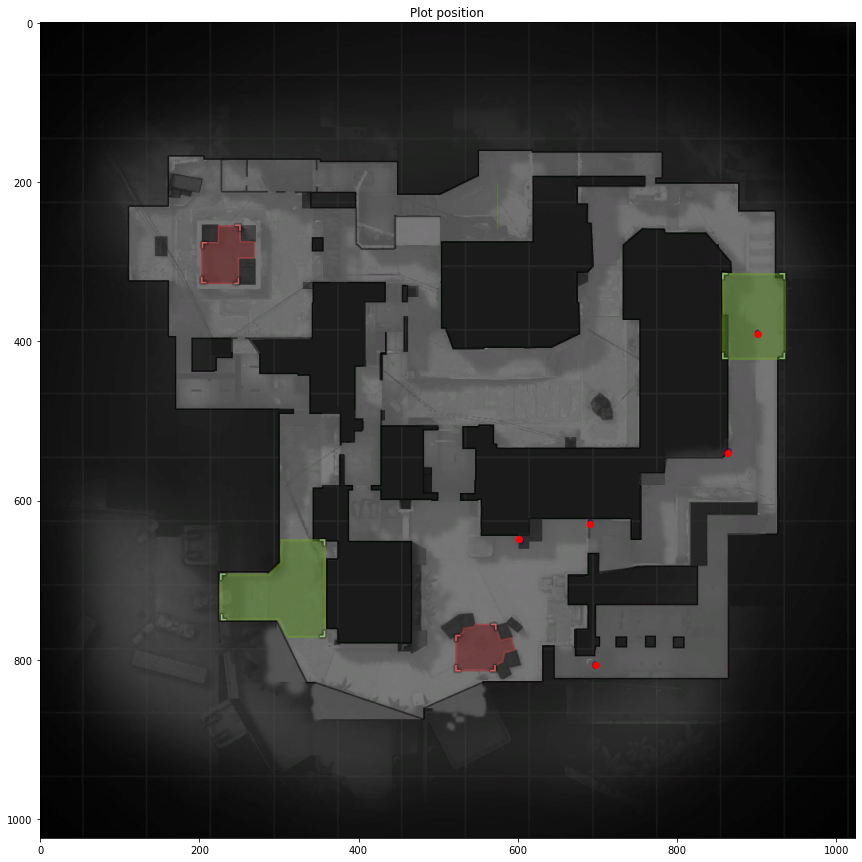

In [142]:
plot_map(df2,carte,couleur='red')

In [101]:
list_match[0]["gameRounds"][0]["frames"][7]['t']["players"][1]['x']

1296

In [79]:
dataframe = pd.DataFrame([[ct_x,ct_y]],columns=['x','y'])
dataframeT = pd.DataFrame([[ct_x,ct_y]],columns=['x','y'])
dataframe

,x,y
0,591.632153,768.982048


In [136]:
def plot_map(dataframe_position,carte,couleur='red'):
    map_bg = plt.imread("C:/Users/thibault/cs_go_project/map_adjustement/"+carte+".PNG")
    plt.figure()
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.set_title('Plot position')
    ax.scatter(
                    [dataframe_position['x']],
                    [dataframe_position['y']],
                    color=couleur,
                        alpha=1,
                        zorder=2,
                        cmap='hot'
                    )
    hb=ax.hexbin([dataframe_position['x']], [dataframe_position['y']], gridsize=50,mincnt=0.01,alpha=0.5) 
    ax.imshow(map_bg,zorder=0)

In [36]:
list_of_dataframeT = [pd.DataFrame(np.array([pointx_to_resolutionx(list_match[0]["gameRounds"][3]["bombEvents"][3]['playerX'],"de_mirage"),pointy_to_resolutiony(list_match[0]["gameRounds"][3]["bombEvents"][3]['playerY'],"de_mirage")]).reshape(1,2),columns=[0,1])]
list_of_dataframeT

[            0           1
 0  523.805505  771.990852]

<Figure size 432x288 with 0 Axes>

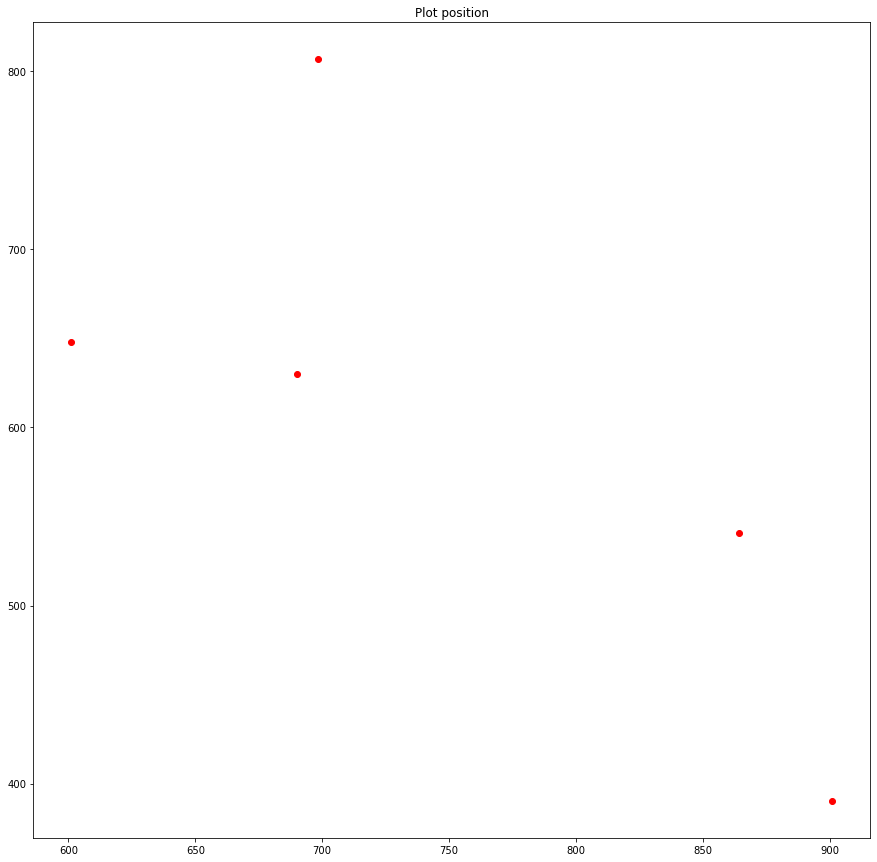

In [145]:
map_bg = plt.imread("C:/Users/thibault/cs_go_project/map_adjustement/"+carte+".PNG")
plt.figure()
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Plot position')
ax.scatter(
                [df2['x']],
                [df2['y']],
                color="red",
                    alpha=1,
                    zorder=2,
                    cmap='hot'
                )
#hb=ax.hexbin([dataframe_position['x']], [dataframe_position['y']], gridsize=50,mincnt=0.01,alpha=0.5) 
#ax.imshow(map_bg,zorder=0)

KeyError: 'CT_position'

<Figure size 432x288 with 0 Axes>

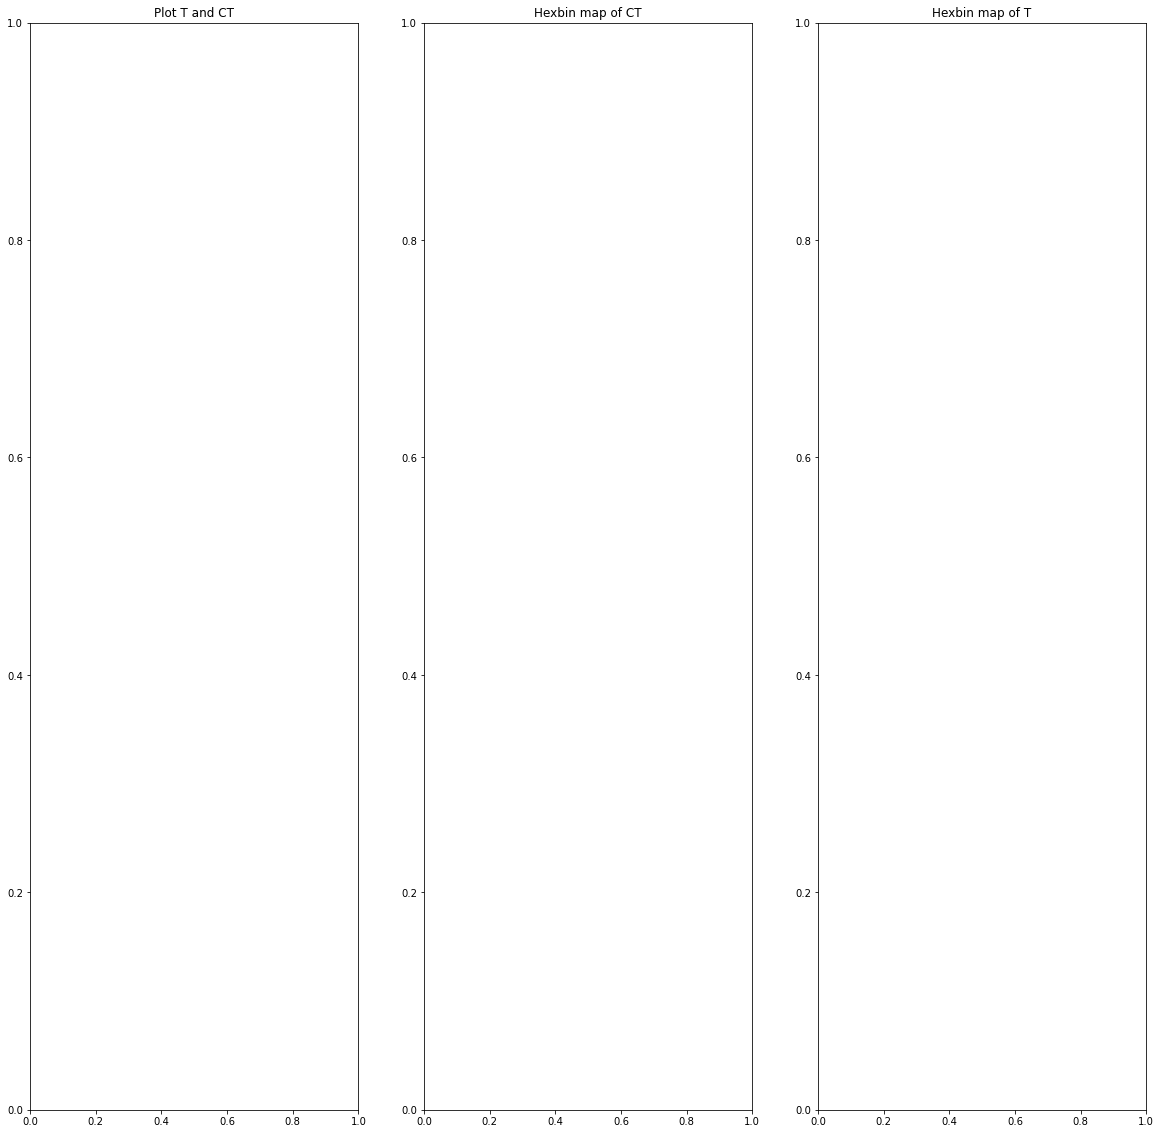

In [38]:
heatmap(list_of_dataframeCT,list_of_dataframeT,img)

In [84]:
for i in range(len(list_match[num_match]["gameRounds"][0]["frames"][7]['t']['players'])):
    if list_match[num_match]["gameRounds"][0]["frames"][7]['t']['players'][i]["name"]=="memetiti":
        print("yes")

yes


In [87]:
list_match[num_match]['gameRounds'][15]

{'roundNum': 16,
 'isWarmup': False,
 'startTick': 187769,
 'freezeTimeEndTick': 189305,
 'endTick': 196749,
 'endOfficialTick': 197645,
 'bombPlantTick': 193231,
 'tScore': 8,
 'ctScore': 7,
 'endTScore': 9,
 'endCTScore': 7,
 'ctTeam': 'team_GiM6',
 'tTeam': 'team_Riky_JNK',
 'winningSide': 'T',
 'winningTeam': 'team_Riky_JNK',
 'losingTeam': 'team_GiM6',
 'roundEndReason': 'TerroristsWin',
 'ctFreezeTimeEndEqVal': 4250,
 'ctRoundStartEqVal': 1000,
 'ctRoundSpendMoney': 3250,
 'ctBuyType': 'Full Eco',
 'tFreezeTimeEndEqVal': 2300,
 'tRoundStartEqVal': 1000,
 'tRoundSpendMoney': 3350,
 'tBuyType': 'Full Eco',
 'ctSide': {'teamName': 'team_GiM6',
  'players': [{'playerName': 'Alkaaris', 'steamID': 76561198038862865},
   {'playerName': 'GiM6', 'steamID': 76561198160839517},
   {'playerName': 'memetiti', 'steamID': 76561198008629507},
   {'playerName': 'Rogoj1ne', 'steamID': 76561198883258102},
   {'playerName': 'Furiyox', 'steamID': 76561198056621009}]},
 'tSide': {'teamName': 'team_Rik

In [24]:
from Match_recuperation.Data_Parse import *
from faceit_api.faceit_data import FaceitData

player_id = get_player_id(api_key="38b28095-4ca6-48b6-aec5-748f507d5fcf",nickname = "Memetits")['player_id']

faceit_data = FaceitData("38b28095-4ca6-48b6-aec5-748f507d5fcf")
all_match_player = faceit_data.player_matches(player_id=player_id, game="csgo",
                                                  starting_item_position=0,
                                                  return_items=2)
carte = faceit_data.match_details(match_id=all_match_player["items"][0]['match_id'])['voting']['map']['pick'][0]
carte

'de_nuke'

In [22]:
faceit_data.match_details(match_id=all_match_player["items"][0]['match_id'])['voting']['map']['pick'][0]

'de_nuke'

In [26]:
all_match_player["items"][0]["match_id"]

'1-ebdd2e48-3c50-4445-93fd-ee47a6afde53'

In [28]:
for i in all_match_player["items"]:
    print(i['match_id'])

1-ebdd2e48-3c50-4445-93fd-ee47a6afde53
1-e05679e9-ae64-4022-85c7-7ea5b1f0a5ea


In [1]:
from oppenant_analysis.oppenent_analysis import *

player_name = "memetiti"
map_select = "de_inferno"

match_recuperation_dict_txt(api_key="38b28095-4ca6-48b6-aec5-748f507d5fcf",
                            player_id="57c4c556-3b8e-4695-bf55-122dde5040db", starting_item_position_call=0,
                            return_items_call=30, map_select=map_select, nickname = player_name )



_______________START DOWNLOADING MATCH NUMBER : 1 on map : de_dust2 ___SUCCEED BEFORE :  0
wrong map:  de_dust2 vs de_inferno
_______________START DOWNLOADING MATCH NUMBER : 2 on map : de_overpass ___SUCCEED BEFORE :  0
wrong map:  de_overpass vs de_inferno
_______________START DOWNLOADING MATCH NUMBER : 3 on map : de_nuke ___SUCCEED BEFORE :  0
wrong map:  de_nuke vs de_inferno
_______________START DOWNLOADING MATCH NUMBER : 4 on map : de_ancient ___SUCCEED BEFORE :  0
wrong map:  de_ancient vs de_inferno
_______________START DOWNLOADING MATCH NUMBER : 5 on map : de_overpass ___SUCCEED BEFORE :  0
wrong map:  de_overpass vs de_inferno
_______________START DOWNLOADING MATCH NUMBER : 6 on map : de_inferno ___SUCCEED BEFORE :  0
1-b3578b55-a1f9-4e6b-8607-49d7b2b516c4
memetiti_de_inferno_1653069864_1-6c618448-670a-4144-9d0d-9ee82287433f.json  compare to :  memetiti_de_inferno_1657658292_1-b3578b55-a1f9-4e6b-8607-49d7b2b516c4.txt
memetiti_de_inferno_1654897943_1-609544a9-2fb6-4443-b275-396

C:/demo_csgo/DataBase/de_inferno_1650996542.dem.7z
patool: Extracting C:/demo_csgo/DataBase/de_inferno_1650996542.dem.7z ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -oC:/demo_csgo/DataBase -- C:/demo_csgo/DataBase/de_inferno_1650996542.dem.7z
patool: ... C:/demo_csgo/DataBase/de_inferno_1650996542.dem.7z extracted to `C:/demo_csgo/DataBase'.
debut du parse
parse success
de_inferno_1650996542_1-d50b70ed-e0dc-4e08-8275-67d10a2fe3fb
_______________START DOWNLOADING MATCH NUMBER : 28 on map : de_inferno ___SUCCEED BEFORE :  2
1-df562f4b-8d7d-437f-bd7e-dc372aa4515d
memetiti_de_inferno_1650996542_1-d50b70ed-e0dc-4e08-8275-67d10a2fe3fb.json  compare to :  memetiti_de_inferno_1650919151_1-df562f4b-8d7d-437f-bd7e-dc372aa4515d.txt
memetiti_de_inferno_1652475778_1-0448c66d-83ce-45a4-b1e5-a13b9ec02642.json  compare to :  memetiti_de_inferno_1650919151_1-df562f4b-8d7d-437f-bd7e-dc372aa4515d.txt
memetiti_de_inferno_1653069864_1-6c618448-670a-4144-9d0d-9ee82287433f.json  compare to :  memet

In [3]:
print("SIDE = T, map:",map_select,"team :",player_name)
gunround_T_analysis(player_name,map_select)


SIDE = T, map: de_inferno team : memetiti


19:20:39 [INFO] NumExpr defaulting to 4 threads.


,Middle,Banana,SecondMid,BackAlley,Apartments,TRamp,prob
0,0.0,2,0.0,1.0,2.0,0.0,0.111111
1,0.0,2,1.0,0.0,2.0,0.0,0.111111
2,0.0,2,1.0,1.0,1.0,0.0,0.111111
3,0.0,2,1.0,2.0,0.0,0.0,0.222222
4,0.0,2,2.0,1.0,0.0,0.0,0.111111
5,0.0,2,3.0,0.0,0.0,0.0,0.111111
6,0.0,4,0.0,0.0,0.0,1.0,0.111111
7,1.0,3,1.0,0.0,0.0,0.0,0.111111


In [4]:

print("SIDE = CT, map:",map_select,"team :",player_name)
gunround_CT_analysis(player_name,map_select)

SIDE = CT, map: de_inferno team : memetiti


,Apartments,Arch,Ruins,BombsiteB,TopofMid,BombsiteA,Balcony,Banana,prob
0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.111111
1,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.111111
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.111111
3,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.222222
4,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.222222
5,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.111111
6,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.111111
